# <div align='center'>Logistic Regression</div>

<div align='left'>Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. In regression analysis, logistic regression is estimating the parameters of a logistic model. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds for the value labeled "1" is a linear combination of one or more independent variables the independent variables can each be a binary variable or a continuous variable. The corresponding probability of the value labeled "1" can vary between 0 and 1. The function that converts log-odds to probability is the logistic function, hence the name Logistic Regression.</div>

<br>
<br>

![log_reg](./Images/Log_reg.png)

<br>
<br>

![log_reg](./Images/Log_regeq.png)

<br>
<br>

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

### Basic Logistic Regression for Binary classification

In [2]:
class Logistic_Regression():
    
    def __init__(self,lr,n_iters=100):
        
        self.lr = lr
        self.epochs = n_iters
        self.poly = None
        self.W = None
        self.Ehist = []
        
    def Sigmoid(self,Z):
        
        return scipy.special.expit(Z)
    
    def Generate_poly_features(self,X_,n):
        
        poly_features = PolynomialFeatures(n)
        return poly_features.fit_transform(X_)
        
    
    def CostFn(self,h_,y_,m):
        
        cost = (-1/m)*np.sum((y_.T).dot(np.log(h_))+(1-y_).T.dot(np.log(1-h_)))
        return cost
    
    def fit(self,X,y,p=None):
        
        self.poly = p
        
        # Generating Polynomial Features
        if(self.poly !=None):
            X = self.Generate_poly_features(X,self.poly)
            
        # Adding the bias terms as a column to the feature matrix
        X = np.insert(X,0,1,axis=1)
        
        y = y.reshape(-1,1)
        
        n_samples, n_features = X.shape
        
        self.W = np.zeros((n_features,1))
        
        for epoch in range(self.epochs):
            
            h = self.Sigmoid(np.dot(X,self.W))
            self.Ehist.append(self.CostFn(h,y,n_samples))
            self.W -= self.lr*(1/n_samples)*(np.dot((X.T),(h-y)))
                
    def predict(self, X_):
        
        if(self.poly !=None):
            X_ = self.Generate_poly_features(X_,self.poly)
         
        X_ = np.insert(X_,0,1,axis=1)
        h = self.Sigmoid(np.dot(X_,self.W))
        return h
    
    def calc_Accuracy(self, X_,y_):
        
        y_ = y_.reshape(-1,1)
        
        n_samples = y_.shape[0]
        
        h = self.predict(X_)
        
        y_hat = np.array([h>=0.5]).reshape(-1,1)
        acc = np.mean(y_hat==y_)
        
        return acc

In [3]:
# Linearly Separable Dataset
X_linear, y_linear = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=.9, random_state=0)

# Non Linearly Separable Dataset
X_poly, y_poly = make_moons(n_samples=100, noise=0.1, random_state=0)

# Linear Classifier
clf_linear = Logistic_Regression(0.1,5000)
clf_linear.fit(X_linear,y_linear)

# Non Linear Classifier
clf_poly = Logistic_Regression(0.1,8000)
clf_poly.fit(X_poly,y_poly,4)

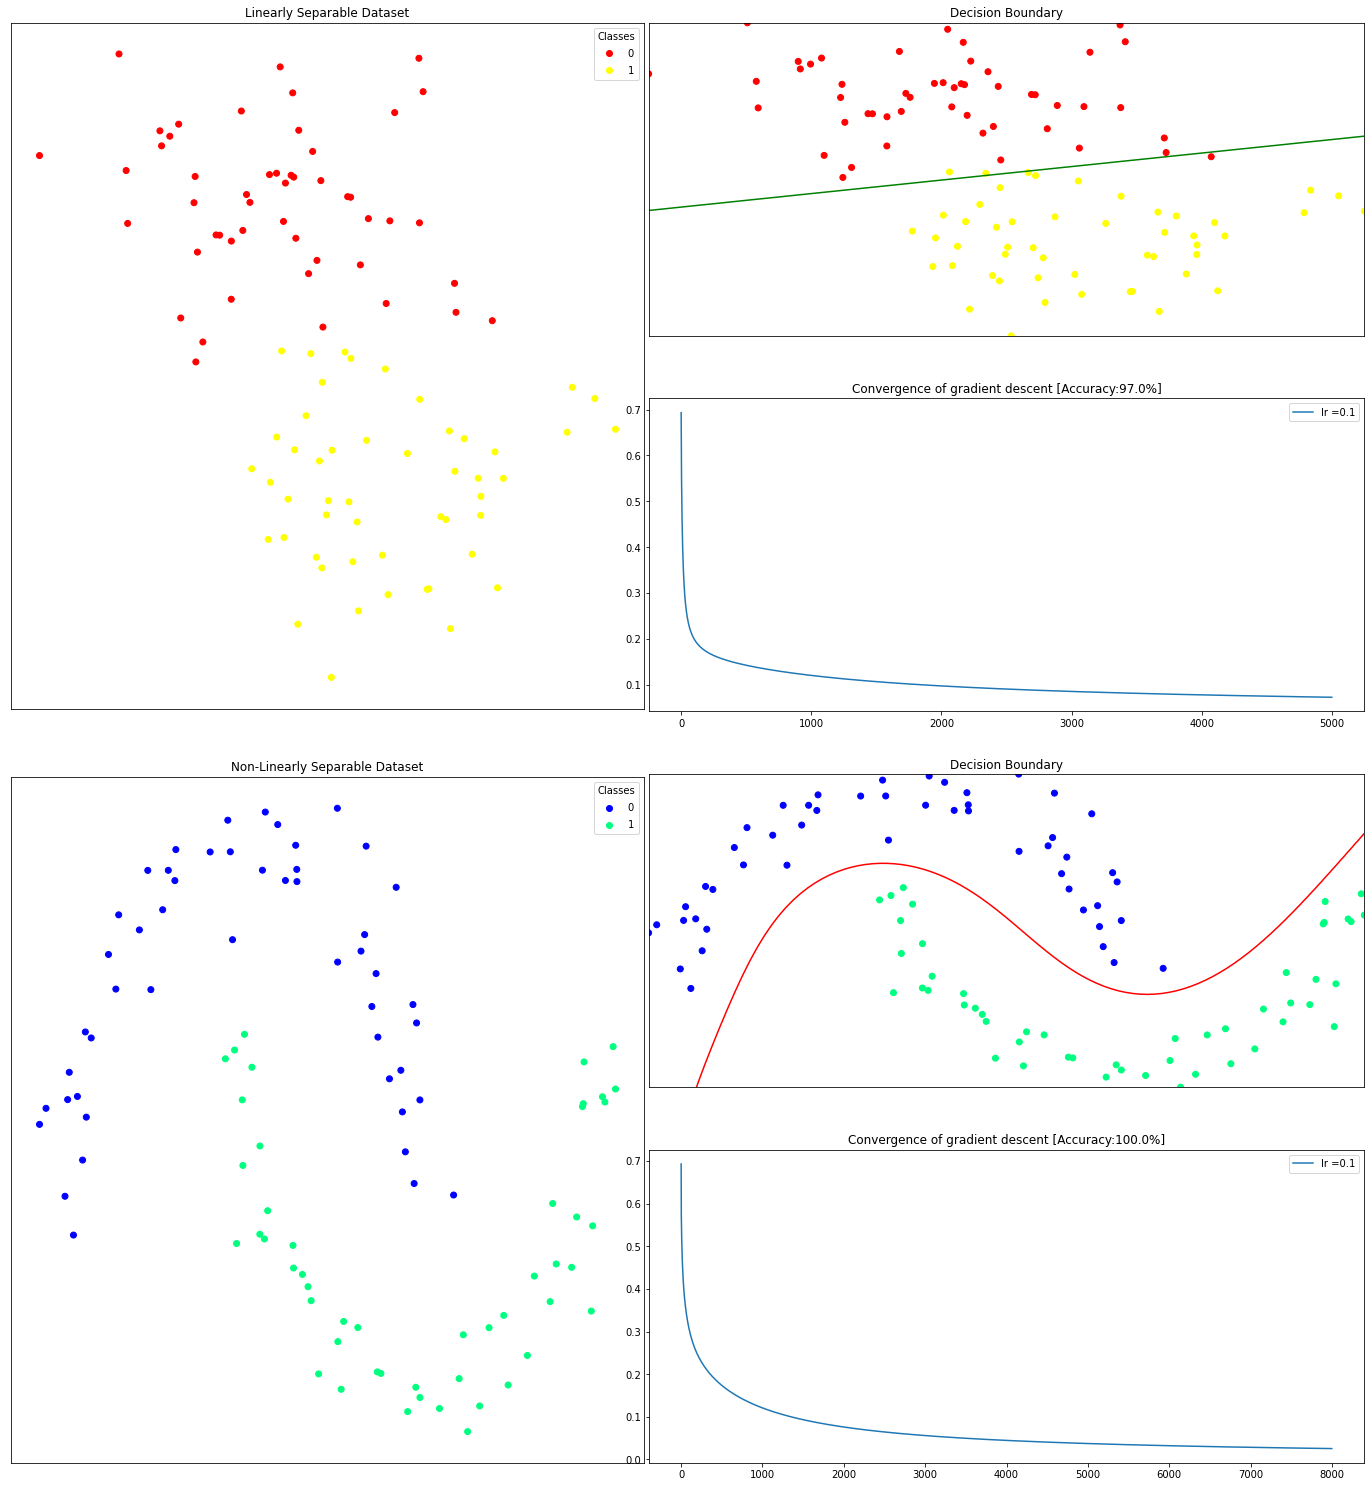

In [4]:
# Visualizing Logistic_Regression
fig = plt.figure(figsize=(20,25),constrained_layout=False)
gs_1 = fig.add_gridspec(nrows=2, ncols=1, left=0.04, right=0.48,top=0.9, bottom=0.1,wspace=.5,hspace=0.1,)
gs_2 = fig.add_gridspec(nrows=4, ncols=1, left=0.483, right=0.98,top=0.9, bottom=0.1,hspace=0.2,wspace=.5)


# Logistic_Regression in case of linearly separable dataset
axs1 = fig.add_subplot(gs_1[0,-1])
s1_plot = axs1.scatter(X_linear[:,0],X_linear[:,1], c=y_linear,cmap='autumn')
legends = axs1.legend(*s1_plot.legend_elements(),loc="upper right", title="Classes")
axs1.set_title('Linearly Separable Dataset')
axs1.set_xticks([])
axs1.set_yticks([])

x1_min,x1_max = X_linear[:,0].min(),X_linear[:,0].max()
x2_min,x2_max = X_linear[:,1].min(),X_linear[:,1].max()

xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))
X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(xx1), np.ravel(xx2))])
Z = clf_linear.predict(X).reshape(xx1.shape)

axs1_1 = fig.add_subplot(gs_2[0,-1])
axs1_1.scatter(X_linear[:,0],X_linear[:,1], c=y_linear,cmap='autumn')
axs1_1.contour(xx1,xx2,Z,[0.5],colors='g')
axs1_1.set_title('Decision Boundary')
axs1_1.set_xticks([])
axs1_1.set_yticks([])

axs1_2 = fig.add_subplot(gs_2[1,-1])
acc1 = clf_linear.calc_Accuracy(X_linear,y_linear)
axs1_2.plot(clf_linear.Ehist,label='lr ={}'.format(clf_linear.lr))
axs1_2.set_title('Convergence of gradient descent [Accuracy:{}%]'.format(acc1*100))
axs1_2.legend(loc='upper right')


# Logistic_Regression in case of non-linearly separable dataset
axs2 = fig.add_subplot(gs_1[1,-1])
s2_plot = axs2.scatter(X_poly[:,0],X_poly[:,1], c=y_poly,cmap='winter')
legends = axs2.legend(*s2_plot.legend_elements(),loc="upper right", title="Classes")
axs2.set_title('Non-Linearly Separable Dataset')
axs2.set_xticks([])
axs2.set_yticks([])

x1_minp,x1_maxp = X_poly[:,0].min(),X_poly[:,0].max()
x2_minp,x2_maxp = X_poly[:,1].min(),X_poly[:,1].max()

xx1p,xx2p = np.meshgrid(np.linspace(x1_minp,x1_maxp,100),np.linspace(x2_minp,x2_maxp,100))
Xp = np.array([[x1, x2] for x1, x2 in zip(np.ravel(xx1p), np.ravel(xx2p))])
Zp = clf_poly.predict(Xp).reshape(xx1p.shape)

axs2_1 = fig.add_subplot(gs_2[2,-1])
axs2_1.scatter(X_poly[:,0],X_poly[:,1], c=y_poly,cmap='winter')
axs2_1.contour(xx1p,xx2p,Zp,[0.5],colors='r')
axs2_1.set_title('Decision Boundary')
axs2_1.set_xticks([])
axs2_1.set_yticks([])

axs2_2 = fig.add_subplot(gs_2[3,-1])
axs2_2.plot(clf_poly.Ehist,label='lr ={}'.format(clf_poly.lr))
acc2 = clf_poly.calc_Accuracy(X_poly,y_poly)
axs2_2.set_title('Convergence of gradient descent [Accuracy:{}%]'.format(acc2*100))
axs2_2.legend(loc='upper right')

plt.show()